In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = 'Datos/Precios Mandarina Oneco.xlsx'

df = pd.read_excel(path,
              index_col='Fecha',
              parse_dates=True
             )
df.index.freq='MS'


df.head()

,Promedio de precio mensual mayorista
Fecha,
2017-01-01,2500
2017-02-01,3375
2017-03-01,3075
2017-04-01,2650
2017-05-01,2450


In [3]:
# Defino Variables

df.rename(columns = {'Promedio de precio mensual mayorista': 'precio_COP'}, inplace = True)
df.head()

,precio_COP
Fecha,
2017-01-01,2500
2017-02-01,3375
2017-03-01,3075
2017-04-01,2650
2017-05-01,2450


<AxesSubplot:xlabel='Fecha'>

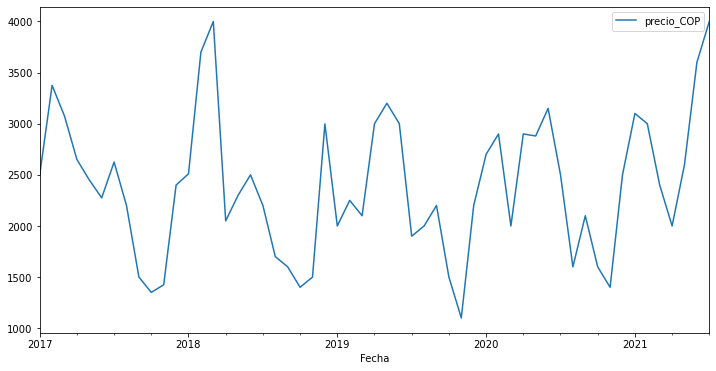

In [4]:
df.plot(figsize=(12,6))

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose

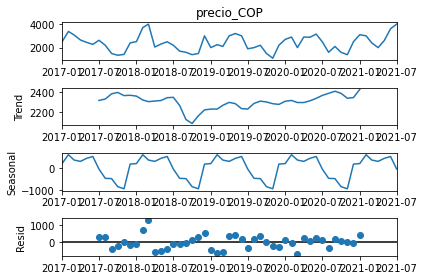

In [6]:
results = seasonal_decompose(df['precio_COP'])
results.plot();

No vamos a convertir la serie en estacionaria porque en teoría las predicciones de RNN se pueden adaptar a este patrón, y a diferentes tipos de patrones complejos, que otros modelos más simples no adaptarían.

In [7]:
len(df)

55

In [8]:
train = df.iloc[:45] 
#La parte de entrenamiento van a ser todos los datos excepto últimos 10 meses

test =df.iloc[45:]

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Con esta herramienta, convertimos la serie en una escala de 0 a 1



In [10]:
df.head(),df.tail() #Vemos como son los datos.

(            precio_COP
 Fecha                 
 2017-01-01        2500
 2017-02-01        3375
 2017-03-01        3075
 2017-04-01        2650
 2017-05-01        2450,
             precio_COP
 Fecha                 
 2021-03-01        2400
 2021-04-01        2000
 2021-05-01        2600
 2021-06-01        3600
 2021-07-01        4000)

In [11]:
# Tranformamos la serie de entrenamiento y testeo
# Vemos como quedan los primeros 10 datos de entrenamiento.

scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)
scaled_train[:10]

array([[0.48275862],
       [0.78448276],
       [0.68103448],
       [0.53448276],
       [0.46551724],
       [0.40517241],
       [0.52586207],
       [0.37931034],
       [0.13793103],
       [0.0862069 ]])

In [12]:
from keras.preprocessing.sequence import TimeseriesGenerator

Init Plugin
Init Graph Optimizer
Init Kernel


In [13]:
# Definimos generador
# Al estar hablando de modelos supervisados, debemos decirle al modelo cuales son los input y cuales son los output


n_input = 3 # Este número son los meses de "entrenemiento"
n_features = 1 # Este es el número de series implementadas, en este caso solo es una (Precio_COP)

generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)


In [14]:
X,y = generator[0]
print(f'Dado el Array: \n{X.flatten()}')
print(f'Predice esta y: \n {y}')

Dado el Array: 
[0.48275862 0.78448276 0.68103448]
Predice esta y: 
 [[0.53448276]]


In [15]:
X.shape

(1, 3, 1)

In [16]:
# Hacemos lo mismo, pero esta vez con 12 meses

n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [17]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [18]:
# define model
model = Sequential()
model.add(LSTM(100,  # Vamos a usar 100 neuronas
               activation='relu', # La funcion de activación que vamos a usar es "relu"
               input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

Metal device set to: Apple M1


2021-11-21 16:29:36.356534: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-11-21 16:29:36.357001: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               40800     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [20]:
# fit model
model.fit(generator,epochs=50)

Epoch 1/50


2021-11-21 16:29:36.465523: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-11-21 16:29:36.466935: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2021-11-21 16:29:45.180782: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


33/33 [==============================] - 13s 132ms/step - loss: 0.1452
Epoch 2/50
33/33 [==============================] - 4s 127ms/step - loss: 0.0589
Epoch 3/50
33/33 [==============================] - 4s 125ms/step - loss: 0.0589
Epoch 4/50
33/33 [==============================] - 4s 126ms/step - loss: 0.0815
Epoch 5/50
33/33 [==============================] - 4s 133ms/step - loss: 0.0441
Epoch 6/50
33/33 [==============================] - 4s 126ms/step - loss: 0.0547
Epoch 7/50
33/33 [==============================] - 4s 126ms/step - loss: 0.0707
Epoch 8/50
33/33 [==============================] - 4s 125ms/step - loss: 0.0568
Epoch 9/50
33/33 [==============================] - 4s 126ms/step - loss: 0.0438
Epoch 10/50
33/33 [==============================] - 4s 126ms/step - loss: 0.0788
Epoch 11/50
33/33 [==============================] - 4s 126ms/step - loss: 0.0587
Epoch 12/50
33/33 [==============================] - 4s 126ms/step - loss: 0.0632
Epoch 13/50
33/33 [================

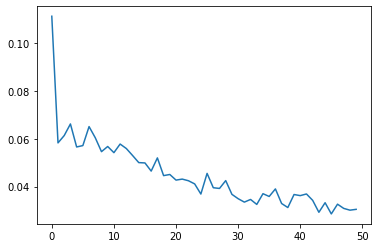

In [21]:
# Vemos como se comportan la función de pérdida.

loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [22]:
last_train_batch = scaled_train[-12:]

In [23]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))


In [24]:
model.predict(last_train_batch)


2021-11-21 16:33:14.950181: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


array([[0.21004003]], dtype=float32)

In [25]:
scaled_test[0]

array([0.17241379])

In [26]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)
    

In [27]:
test_predictions

[array([0.21004003], dtype=float32),
 array([0.20380789], dtype=float32),
 array([0.4484711], dtype=float32),
 array([0.5415763], dtype=float32),
 array([0.5987385], dtype=float32),
 array([0.5153538], dtype=float32),
 array([0.6046269], dtype=float32),
 array([0.5794902], dtype=float32),
 array([0.55396014], dtype=float32),
 array([0.418022], dtype=float32)]

In [28]:
test.head()

,precio_COP
Fecha,
2020-10-01,1600
2020-11-01,1400
2020-12-01,2500
2021-01-01,3100
2021-02-01,3000


In [29]:
true_predictions = scaler.inverse_transform(test_predictions)

In [30]:
test['Predictions'] = true_predictions

/var/folders/nc/q_wx5s2168v477f_1tb20rcr0000gn/T/ipykernel_4728/4269337381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


<AxesSubplot:xlabel='Fecha'>

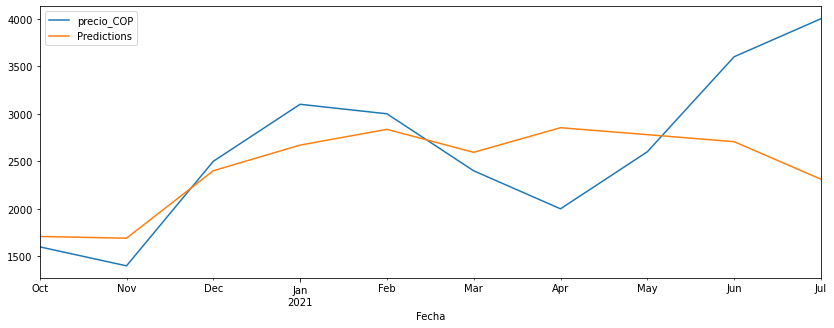

In [31]:
test.plot(figsize=(14,5))

In [32]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['precio_COP'],test['Predictions']))
print(rmse)

690.1642248048507
